In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('./data.csv')

In [71]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [46]:
df.shape

(569, 33)

In [47]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [73]:
df = df.drop(columns=['id', 'Unnamed: 32'])

KeyError: "['id' 'Unnamed: 32'] not found in axis"

In [49]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [50]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

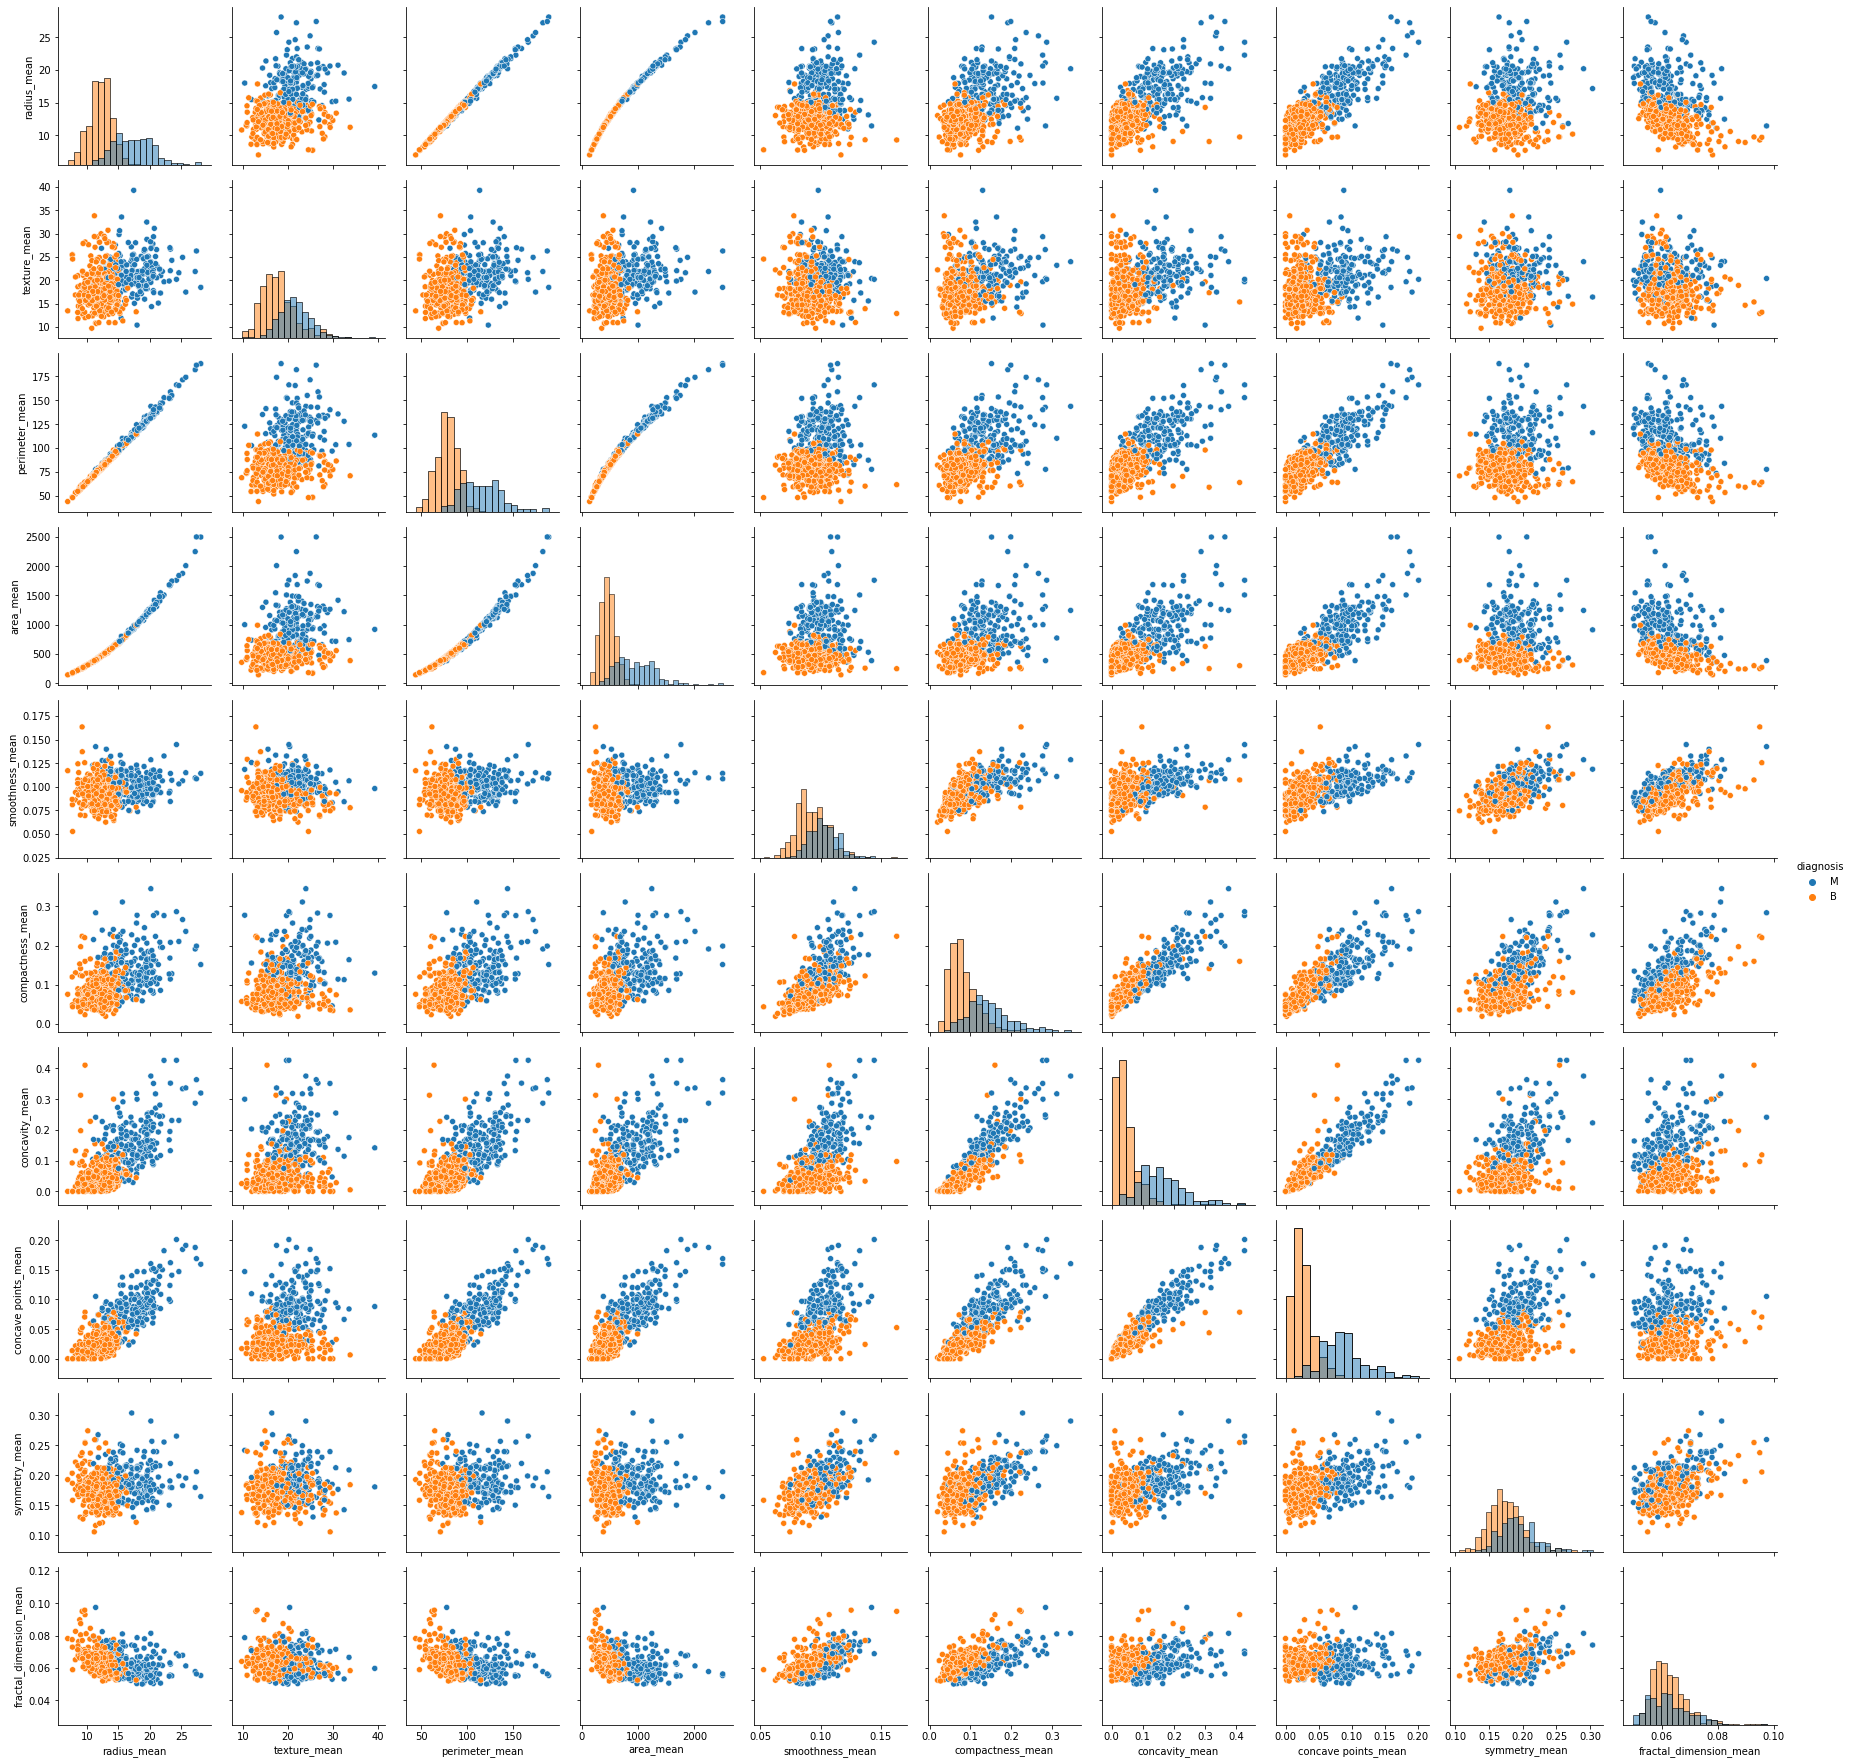

In [51]:
#select some features from the feature space
g = sns.PairGrid(df, vars=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'], hue="diagnosis")
#g = sns.PairGrid(df, hue="diagnosis")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
    

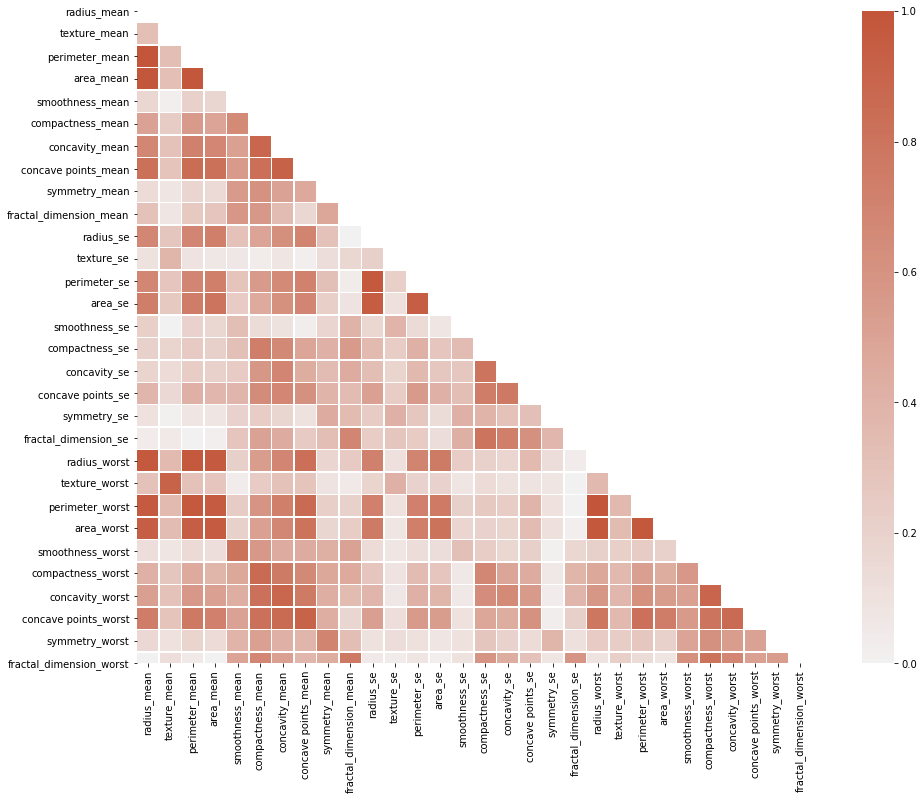

In [52]:
# Compute the correlation matrix
corr = df.corr().abs()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=0.0, center=0.0,
            square=True, linewidths=.5)

In [53]:
#https://stackoverflow.com/a/17778786
s = corr.unstack()
so = s.sort_values(ascending=False, kind='quicksort')
so[(so > 0.85) & (so < 1.0)]

radius_mean           perimeter_mean          0.997855
perimeter_mean        radius_mean             0.997855
radius_worst          perimeter_worst         0.993708
perimeter_worst       radius_worst            0.993708
radius_mean           area_mean               0.987357
area_mean             radius_mean             0.987357
                      perimeter_mean          0.986507
perimeter_mean        area_mean               0.986507
radius_worst          area_worst              0.984015
area_worst            radius_worst            0.984015
perimeter_worst       area_worst              0.977578
area_worst            perimeter_worst         0.977578
radius_se             perimeter_se            0.972794
perimeter_se          radius_se               0.972794
perimeter_worst       perimeter_mean          0.970387
perimeter_mean        perimeter_worst         0.970387
radius_mean           radius_worst            0.969539
radius_worst          radius_mean             0.969539
          

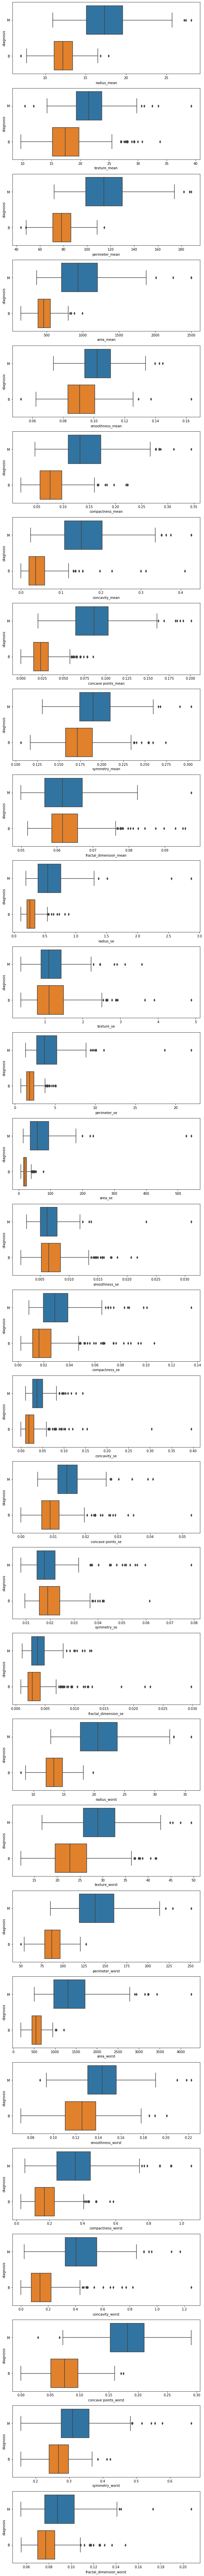

In [54]:
fig, axs = plt.subplots(nrows=30, figsize=(10,140))
for idx, c in enumerate(df.columns):
    if c == 'diagnosis':
        continue
    sns.boxplot(data=df, x=c, y='diagnosis', ax=axs[idx-1])

Very similar distributions for positive and negative outcomes from the boxplots:
'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se'

# knn analysis

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [74]:
y = df.iloc[:,0]
X = df.iloc[:, 1:]

In [75]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [76]:
y.replace(('M','B'), (1, 0), inplace=True)

In [77]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [84]:
#get min-max only for the train sample
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
clf_knn = KNeighborsClassifier()

In [86]:
clf_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [87]:
#https://stackoverflow.com/a/52910821
from sklearn.metrics import roc_curve, auc
y_scores = clf_knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

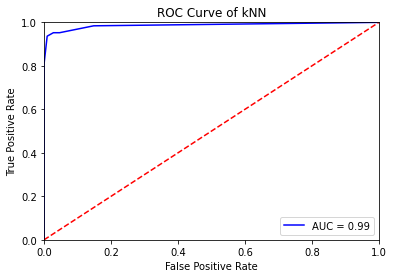

In [88]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [90]:
metrics_ = {'accuracy': accuracy_score, 'precision': precision_score, 'recall': recall_score, 'f1': f1_score}

In [94]:
y_pred = clf_knn.predict(X_test)
for metric_ in metrics_:
    print(metric_)
    print(metrics_[metric_](y_test, y_pred))

accuracy
0.9649122807017544
precision
0.9523809523809523
recall
0.9523809523809523
f1
0.9523809523809523


In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [96]:
def create_knn_pipeline(k: int):
    return make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=k))

In [97]:
#knn_models = {k: KNeighborsClassifier(n_neighbors=k) for k in range(2,200,1)}
knn_models_with_scaling = {k: create_knn_pipeline(k) for k in range(2,200,1)}

In [98]:
def get_scores_for_metric(X_, y_, metric: str):
    scores_ave = []
    for k in knn_models_with_scaling:
        scores = cross_val_score(knn_models_with_scaling[k], X_, y_, cv=5, scoring=metric)
        #print(f'k = {k}', f'accuracy = {scores.mean()}')
        scores_ave.append(scores.mean())
    return scores_ave
    

# Accuracy

In [99]:
scores_accuracy = get_scores_for_metric(X, y, 'accuracy')

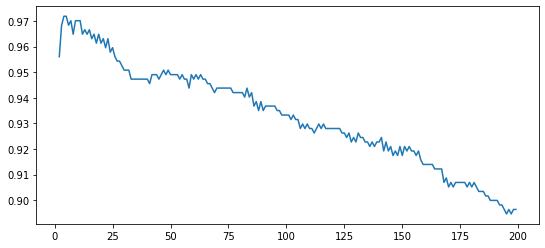

In [100]:
plt.figure(figsize=(9, 4))
plt.plot(list(knn_models_with_scaling.keys()), scores_accuracy)

In [101]:
max_idx = scores_accuracy.index(max(scores_accuracy))
knn_models_with_scaling[max_idx][1].n_neighbors

2

# Precision

In [102]:
scores_precision = get_scores_for_metric(X, y, 'precision')

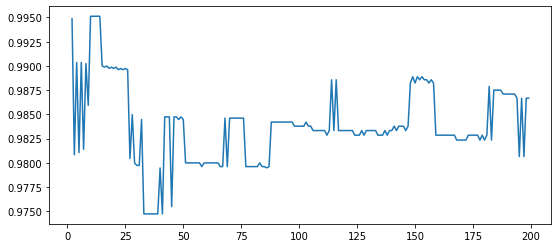

In [103]:
plt.figure(figsize=(9, 4))
plt.plot(list(knn_models_with_scaling.keys()), scores_precision)

In [104]:
max_idx = scores_precision.index(max(scores_precision))
knn_models_with_scaling[max_idx][1].n_neighbors

8

# Recall

In [105]:
scores_recall = get_scores_for_metric(X, y, 'recall')

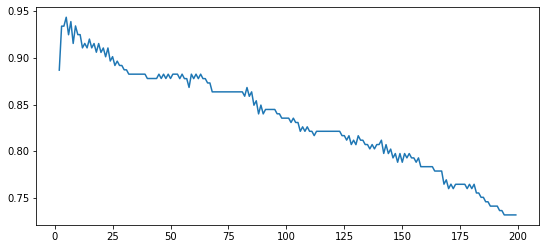

In [106]:
plt.figure(figsize=(9, 4))
plt.plot(list(knn_models_with_scaling.keys()), scores_recall)

In [107]:
max_idx = scores_recall.index(max(scores_recall))
knn_models_with_scaling[max_idx][1].n_neighbors

3

In [112]:
scores_recall[max_idx]

0.9434108527131781

In [111]:
scores_recall[5]

0.9387596899224805

# f1-score

In [115]:
scores_f1 = get_scores_for_metric(X, y, 'f1')

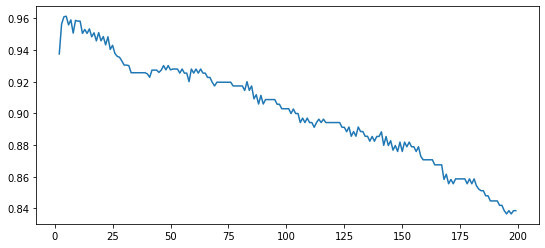

In [116]:
plt.figure(figsize=(9, 4))
plt.plot(list(knn_models_with_scaling.keys()), scores_f1)

In [119]:
max_idx = scores_f1.index(max(scores_f1))
knn_models_with_scaling[max_idx][1].n_neighbors

3

In [120]:
scores_f1[3]

0.9612906770150488

In [121]:
scores_f1[5]

0.9590047045477295

# Final result

| Metric | default n_neighbors = 5   | tuned n_neighbors = 3  |
|------|------|------|
|   RECALL  | 0.9388 | 0.9434 |
|------|------|------|
|   F1  | 0.9600 | 0.9612 |

# Visualize 2-dim embedding

In [75]:
from sklearn.manifold import TSNE

In [76]:
X_embedded = TSNE(n_components=2, n_iter=2500, perplexity=30, random_state=42).fit_transform(X)

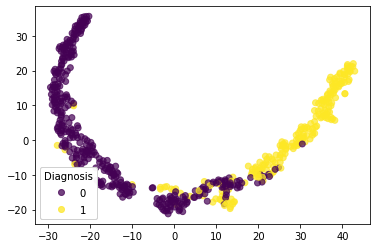

In [77]:
fig, ax = plt.subplots()

scatter = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c = y, alpha = 0.7)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Diagnosis")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, leg_labels = scatter.legend_elements(prop="sizes", alpha=0.6)

plt.show()

# LogReg

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lg_clf = LogisticRegression(random_state=0).fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
y_pred = lg_clf.predict(X_test)
for metric_ in metrics_:
    print(metric_, metrics_[metric_](y_test, y_pred))

accuracy 0.9649122807017544
precision 0.9830508474576272
recall 0.9206349206349206
f1 0.9508196721311476


In [93]:
#logreg_models = {k: LogisticRegression(C=10./k, penalty='l2',max_iter=4000,solver='lbfgs') for k in range(1,1000,1)}

In [94]:
#scores_ave = []
#for k in logreg_models:
#    scores = cross_val_score(logreg_models[k], X, y, cv=5, scoring='accuracy')
#    print(f'k = {k}', f'accuracy = {scores.mean()}')
#    scores_ave.append(scores.mean())

In [95]:
#plt.figure(figsize=(20, 4))
#C_values = [1./k for k in logreg_models.keys()]
#plt.plot(C_values, scores_ave)